# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, _Xbox_ или _PlayStation_ ). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура _ESRB (Entertainment Software Rating Board)_ — это ассоциация, определяющая возрастной рейтинг компьютерных игр. _ESRB_ оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
* _Name_ — название игры
* _Platform_ — платформа
* _Year_of_Release_ — год выпуска
* _Genre_ — жанр игры
* _NA_sales_ — продажи в Северной Америке (миллионы проданных копий)
* _EU_sales_ — продажи в Европе (миллионы проданных копий)
* _JP_sales_ — продажи в Японии (миллионы проданных копий)
* _Other_sales_ — продажи в других странах (миллионы проданных копий)
* _Critic_Score_ — оценка критиков (максимум 100)
* _User_Score_ — оценка пользователей (максимум 10)
* _Rating_ — рейтинг от организации _ESRB (англ. Entertainment Software Rating Board)._ Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Содержание

[1  Шаг 1. Откройте файл с данными и изучите общую информацию](#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию-1)

[1.1  Выводы к первому шагу](#Выводы-к-первому-шагу-1.1)

[2  Шаг 2. Подготовьте данные](#Шаг-2.-Подготовьте-данные-2)

[2.1  Выводы ко второму шагу](#Выводы-ко-второму-шагу-2.1)

[3  Шаг 3. Проведите исследовательский анализ данных](#Шаг-3.-Проведите-исследовательский-анализ-данных-3)

[3.1  Выводы к третьему шагу](#Выводы-к-третьему-шагу-3.1)

[4  Шаг 4. Составьте портрет пользователя каждого региона](#Шаг-4.-Составьте-портрет-пользователя-каждого-региона-4)

[4.1  Выводы к четвёртому шагу](#Выводы-к-четвёртому-шагу-4.1)

[5  Шаг 5. Проверьте гипотезы](#Шаг-5.-Проверьте-гипотезы-5)

[5.1  Выводы к пятому шагу](#Выводы-к-пятому-шагу-5.1)

[6  Шаг 6. Напишите общий вывод](#Шаг-6.-Напишите-общий-вывод-6)

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# открываем файл
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9290,Where the Wild Things Are,DS,2009.0,Platform,0.12,0.00,0.00,0.01,NaN,tbd,E
8100,Shadow The Hedgehog,XB,2005.0,Platform,0.13,0.04,0.00,0.01,49.0,5.5,E10+
15241,Hisshou Pachinko * Pachi-Slot Kouryaku Series ...,PSP,2010.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14488,Puzzle & Action: Tant-R,GEN,1994.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9235,4x4 EVO 2,GC,2002.0,Racing,0.11,0.03,0.00,0.00,56.0,tbd,E
6439,NPPL: Championship Paintball 2009,PS2,2008.0,Shooter,0.13,0.10,0.00,0.03,NaN,8.3,E10+
7073,Hannah Montana: The Movie,PS3,2009.0,Adventure,0.14,0.06,0.00,0.03,NaN,3.4,E
12187,Kanji Sonomama DS Rakubiki Jiten,DS,2006.0,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
15247,Commandos: Strike Force,XB,2006.0,Shooter,0.02,0.00,0.00,0.00,62.0,tbd,T
13398,Taiko no Tatsujin Portable 2,PSP,2006.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN


In [4]:
print('Размер датасета:', games_data.shape)

Размер датасета: (16715, 11)


In [5]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Выводы к первому шагу

В данном шаге был открыт датасет содержащий информацию о компьютерных играх: название, платформа на которой продавалась игра, дата выпуска, жанр, сумма продаж в зависимости от региона, оценка пользователей и критиков, а также возрастной рейтинг. Датасет состоит из 16 715 строк, преимущественно текстового типа и типа float, также видно что в датасете есть пропуски.

## Шаг 2. Подготовьте данные

In [7]:
print('Названия столбцов:', games_data.columns)

Названия столбцов: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [8]:
# приводим названия столбцов к нижнему регистру
games_data.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
                     'other_sales', 'critic_score', 'user_score', 'rating'], axis = 'columns', inplace = True
                   )

In [9]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
games_data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки с пропусками в столбцах _genre_ и _name._ Таких строки всего 2, поэтому данное действие не понесёт критических изменений в датасете.

In [11]:
games_data = games_data.drop(games_data[(games_data['genre'].isnull() == True) & (games_data['name'].isnull() == True)].index).reset_index(drop = True)

Пропуски в столбцах _critic_score_ и _user_score_ не трогаем, что бы они не исказили данные. Предполагаем что пропуски появились в тех местах, где нет оцнки критиков / пользователей, соответственно, например, игра не очень интересна.

In [12]:
games_data['user_score'] = games_data['user_score'].replace('tbd', 0)

games_data['user_score'] = games_data['user_score'].astype('float')

In [13]:
games_data['critic_score'].min()

13.0

In [14]:
games_data['user_score'].min()

0.0

Значение **K-A** столбца _rating_ заменим на **E** , т. к. **K-A** устаревшее обозначение.

In [17]:
print( games_data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [18]:
games_data['rating'] = games_data['rating'].replace('K-A', 'E')

In [19]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [20]:
print('Всего игр, без указания года: {:.2%}'.format(games_data['year_of_release'].isnull().sum() / len(games_data)))

Всего игр, без указания года: 1.61%


In [22]:
games_data['summ_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

In [23]:
# проверим датаест на дубдикаты

print('Число дубликатов в датасете:', games_data.duplicated().sum())

Число дубликатов в датасете: 0


### Выводы ко второму шагу

Во втором шаге были переименованы, согласно заданию, столбцы (приведены к нижнему регистру). Удалены строки с пропусками в столбцах _genre_ и _name,_ т. к. всего таких сроки - 2 штуки. Пропуски в столбцах _critic_score_ и _user_score_ не трогал, что бы не искажать данные. Значение _K-A_ столбца _rating_ заменили на _E,_ т. к. _K-A_ устаревшее обозначение. Игр, без указания года оказалось 1.61%, трогать их не будем, т. к. в итоге рассматриваем игры за конкретный период. Столбуц _critic_score_ привел к целочисленному типу. В столбце _user_score_ значения **tbd** _(предстоит определить)_ заменил на _0,_ т. к. данные игры ещё не были оценены. Пропусков в датасете не найдено. И в заключении была вычеслены общая сумма продаж по всем регионам.

## Шаг 3. Проведите исследовательский анализ данных

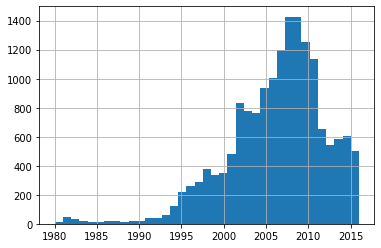

In [24]:
#games_data['year_of_release'].hist(bins = 36, range = (1980, 2016))

games_data['year_of_release'].hist(bins = 37)

In [25]:
# выделим ТОП-5 платформ
games_data_platform_top = games_data.pivot_table(index = 'platform', values = 'summ_sales', aggfunc = 'sum')

In [26]:
# отсортируем по убыванию
games_data_platform_top.sort_values(by = 'summ_sales', ascending = False).head()

,summ_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


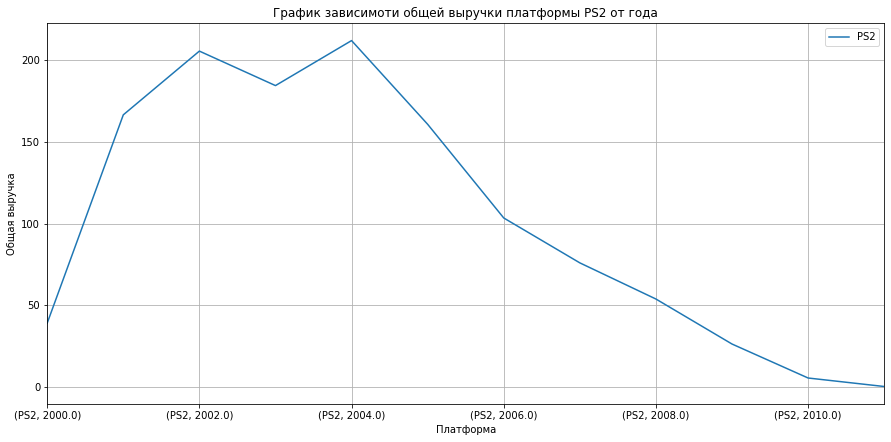

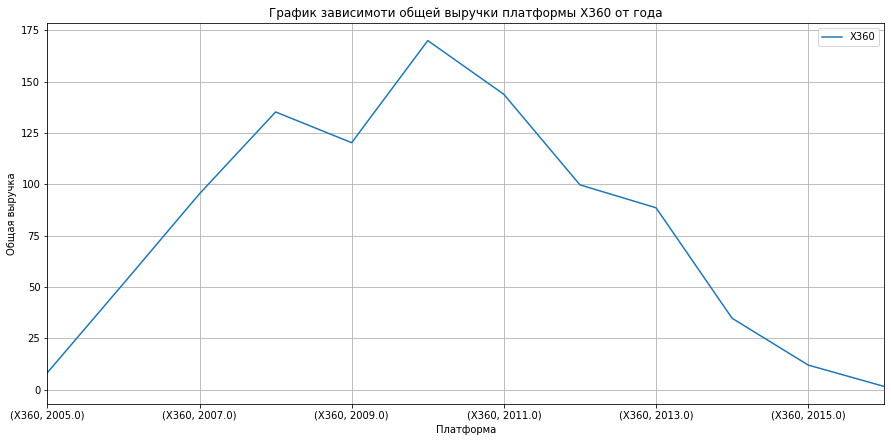

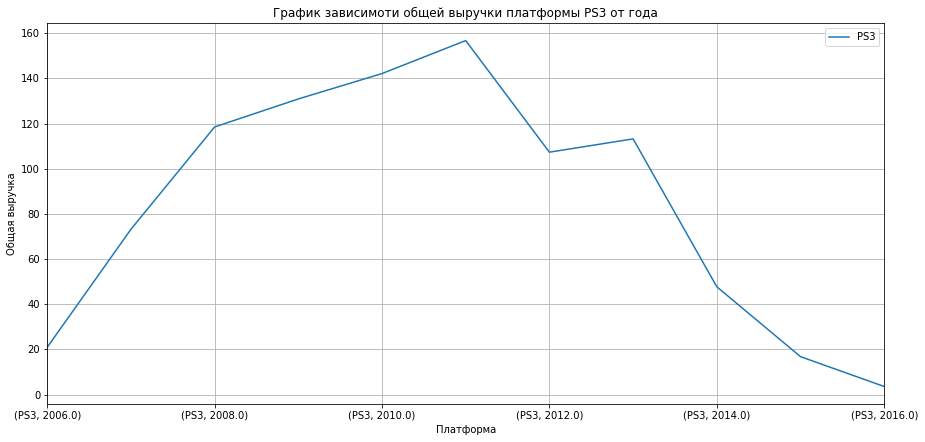

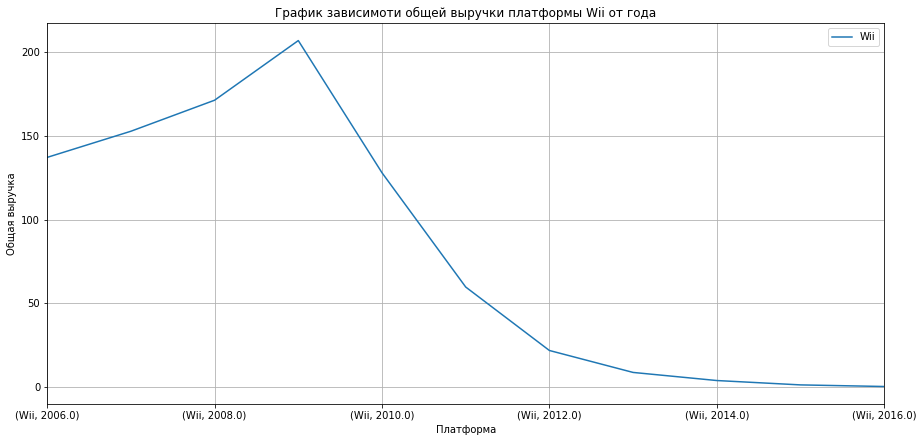

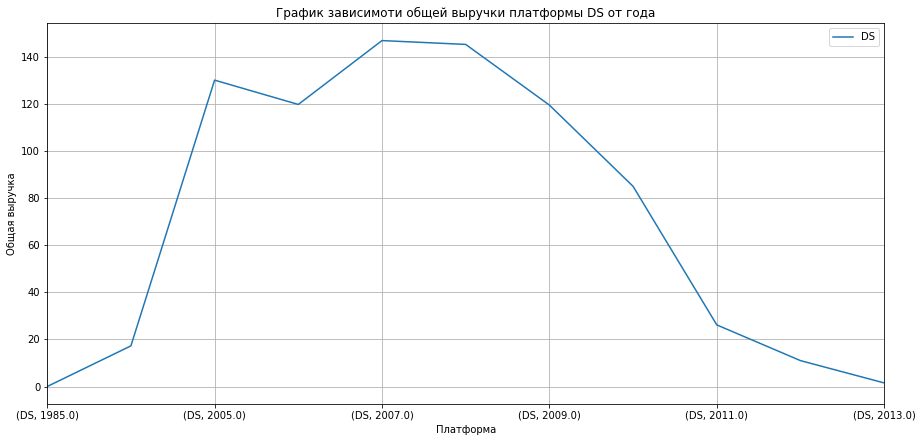

In [27]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
games_data_platform_year = games_data.pivot_table(index = ['platform', 'year_of_release'], values = 'summ_sales', aggfunc = 'sum')

for platform in top_platform:
    games_data_platform_year_for = games_data_platform_year.query('platform == @platform')
    games_data_platform_year_for.plot(y = 'summ_sales', label = platform, grid = True, figsize=(15, 7))
    plt.title('График зависимоти общей выручки платформы ' + platform + ' от года')
    plt.xlabel('Платформа')
    plt.ylabel('Общая выручка')

Из графиков делаем следующие выводы:
* пик продаж игр платформы PS2 приходится на 2001 - 2006 годы
* пик продаж игр платформы Х360 приходится на 2007 - 2013 годы
* пик продаж игр платформы PS3 приходится на 2007 - 2014 годы
* пик продаж игр платформы Wii приходится на 2006 - 2011 годы
* пик продаж игр платформы DS приходится на 2005 - 2010 годы

Выбираем период 2013 - 2015, т. к. данных за 2016 год нет, отрезок 2013 - 2015 г. является наиболее актуальным (выбрали полупериод, с учётом того что платнормы развиваются).

In [28]:
games_data_current_period = games_data.query('(year_of_release >= 2013) & (year_of_release <= 2015)')

In [29]:
# выделим ТОП-5 платформ
games_data_platform_top_period = games_data_current_period.pivot_table(index = 'platform', values = 'summ_sales', aggfunc = 'sum')

In [30]:
games_data_platform_top_period.sort_values(by = 'summ_sales', ascending = False).head(8)

,summ_sales
platform,
PS4,244.89
PS3,177.83
X360,135.28
XOne,133.17
3DS,128.11
WiiU,60.03
PC,34.18
PSV,28.74


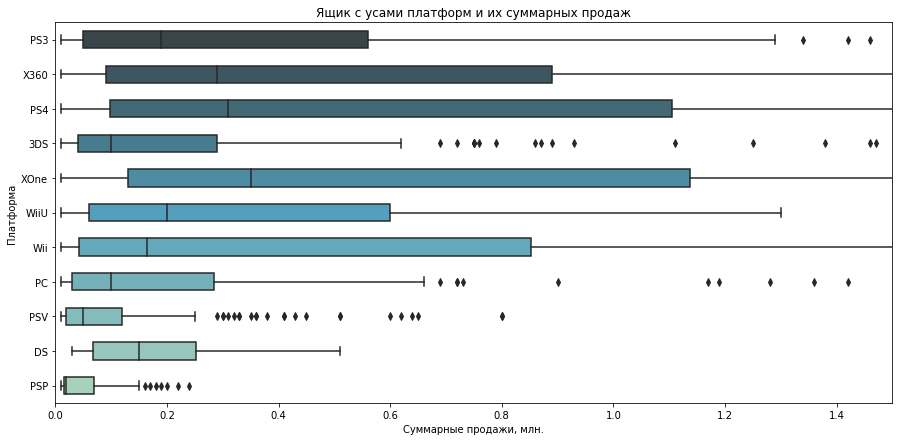

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(data=games_data_current_period, x='summ_sales',y='platform', width=0.5,palette='GnBu_d')
plt.xlim(0, 1.5)
plt.title('Ящик с усами платформ и их суммарных продаж')
plt.xlabel('Суммарные продажи, млн.')
plt.ylabel('Платформа')
plt.show()

Из диаграммы размаха можно сделать следующие выводы:
* большая часть проданных игр платформы PS4 лежит в диапазоне: 0,1 - 1,1 миллионов, медиана лежит на уровне 0,3 миллионов
* большая часть проданных игр платформы PS3 лежит в диапазоне: 0,05 - 0,57 миллионов, медиана лежит на уровне 0,2 миллионов
* большая часть проданных игр платформы X360 лежит в диапазоне: 0,1 - 0,9 миллионов, медиана лежит на уровне 0,3 миллионов
* большая часть проданных игр платформы XOne лежит в диапазоне: 0,15 - 1,15 миллионов, медиана лежит на уровне 0,35 миллионов
* большая часть проданных игр платформы 3DS лежит в диапазоне: 0,04 - 0,3 миллионов, медиана лежит на уровне 0,1 миллионов

* большая часть проданных игр платформы WiiU лежит в диапазоне: 0,05 - 0,6 миллионов, медиана лежит на уровне 0,2 миллионов
* большая часть проданных игр платформы PC лежит в диапазоне: 0,02 - 0,28 миллионов, медиана лежит на уровне 0,1 миллионов
* большая часть проданных игр платформы PSV лежит в диапазоне: 0,01 - 0,13 миллионов, медиана лежит на уровне 0,05 миллионов

In [32]:
games_data_current_period_PS4 = games_data_current_period.query('platform == "PS4"')

In [33]:
games_data_current_period_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


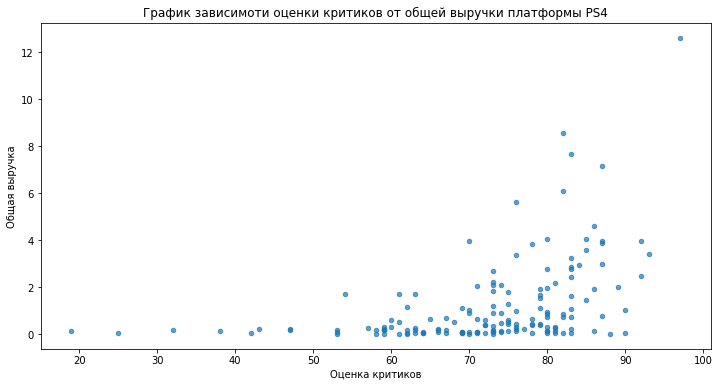

In [34]:
games_data_current_period_PS4.plot(x = 'critic_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки критиков от общей выручки платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Общая выручка')
plt.show()

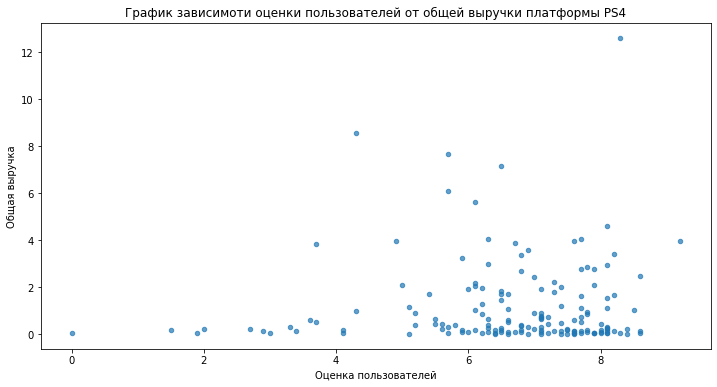

In [35]:
games_data_current_period_PS4.plot(x = 'user_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки пользователей от общей выручки платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая выручка')
plt.show()

In [36]:
print('Коэффициент корреляции между отзывами критиков и суммарными продажами:', games_data_current_period_PS4['critic_score'].corr(games_data_current_period_PS4['summ_sales']))

Коэффициент корреляции между отзывами критиков и суммарными продажами: 0.4318482049982005


In [37]:
print('Коэффициент корреляции между отзывами пользователей и суммарными продажами:', games_data_current_period_PS4['user_score'].corr(games_data_current_period_PS4['summ_sales']))

Коэффициент корреляции между отзывами пользователей и суммарными продажами: 0.04030786276228141


Из графика зависимоти оценки критиков от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 60 - 70 баллов уже достаточно неплохо влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. С помощью коэфициента корреляции делаем вывод, что в целом эта зависимость положительная, связь относится к категории слабой. Также примечателен тот факт, что оценка критиков влияет практически также на продажи игры, как и оценка пользователей.

In [38]:
games_data_current_period_X360 = games_data_current_period.query('platform == "X360"')

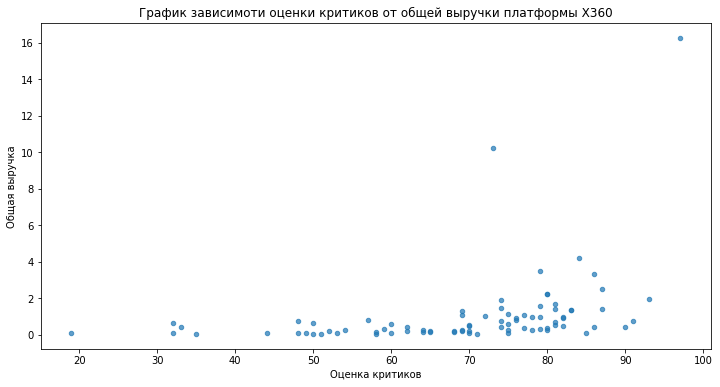

In [39]:
games_data_current_period_X360.plot(x = 'critic_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки критиков от общей выручки платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Общая выручка')
plt.show()

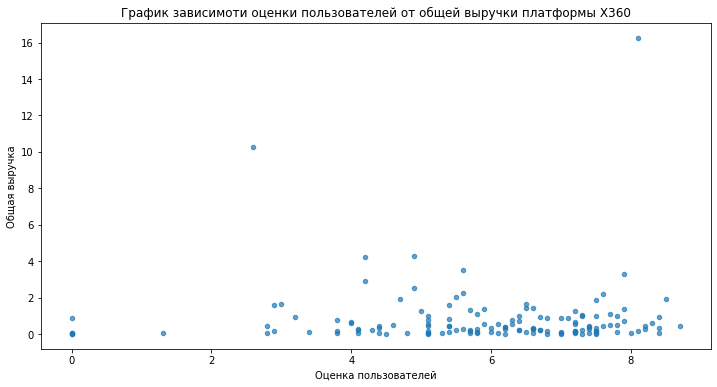

In [40]:
games_data_current_period_X360.plot(x = 'user_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки пользователей от общей выручки платформы X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая выручка')
plt.show()

In [41]:
print('Коэффициент корреляции между отзывами критиков и суммарными продажами:', games_data_current_period_X360['critic_score'].corr(games_data_current_period_X360['summ_sales']))

Коэффициент корреляции между отзывами критиков и суммарными продажами: 0.3503445460228664


In [42]:
print('Коэффициент корреляции между отзывами пользователей и суммарными продажами:', games_data_current_period_X360['user_score'].corr(games_data_current_period_X360['summ_sales']))

Коэффициент корреляции между отзывами пользователей и суммарными продажами: 0.013301715998654281


Из графика зависимоти оценки критиков от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 70 - 80 баллов влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая. Также примечателен тот факт, что оценка пользователей практически не влияет на продажи игры.

Также сравнивая с показателями платформы PS4 делаем вывод что показатели платформы X360 менее явные.

In [43]:
games_data_current_period_3DS = games_data_current_period.query('platform == "3DS"')

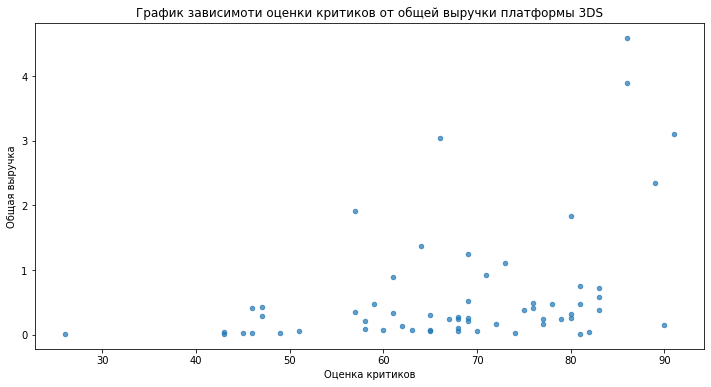

In [44]:
games_data_current_period_3DS.plot(x = 'critic_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки критиков от общей выручки платформы 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Общая выручка')
plt.show()

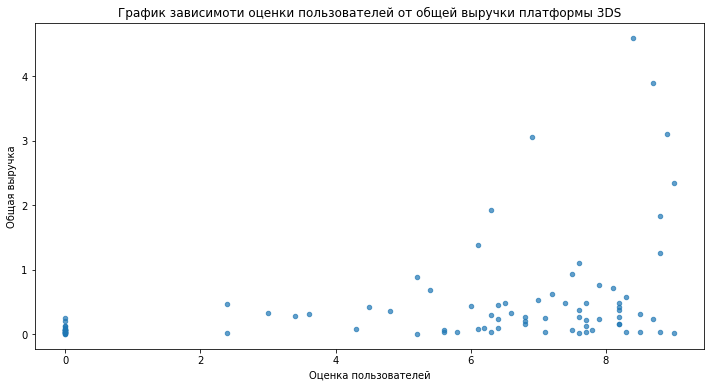

In [45]:
games_data_current_period_3DS.plot(x = 'user_score', y = 'summ_sales', kind = 'scatter', alpha = .7, figsize=(12, 6))
plt.title('График зависимоти оценки пользователей от общей выручки платформы 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая выручка')
plt.show()

In [46]:
print('Коэффициент корреляции между отзывами критиков и суммарными продажами:', games_data_current_period_3DS['critic_score'].corr(games_data_current_period_3DS['summ_sales']))

Коэффициент корреляции между отзывами критиков и суммарными продажами: 0.38432600457452254


In [47]:
print('Коэффициент корреляции между отзывами пользователей и суммарными продажами:', games_data_current_period_3DS['user_score'].corr(games_data_current_period_3DS['summ_sales']))

Коэффициент корреляции между отзывами пользователей и суммарными продажами: 0.36136335769207606


Из графика зависимоти оценки критиков от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Из графика зависимоти оценки пользователей от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая, относится к категории слабой связи. Также примечателен тот факт, что оценка критиков практически в равной степени влияет на продажи игры, как и оценка пользователей.

Примечателен тот факт, что у популярной платнофмы PS4 связь между оценками польхователей и критиков сильнее чем у платформы 3DS. Но при этом критики и пользователи в равной степени влияют на продажи.

In [48]:
games_data_current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [49]:
games_data_current_period_genre = games_data_current_period.pivot_table(index = ['genre'], values = 'summ_sales', aggfunc = 'sum')

In [50]:
games_data_current_period_genre.sort_values(by = 'summ_sales', ascending = False).head(5)

,summ_sales
genre,
Action,291.76
Shooter,194.76
Role-Playing,127.71
Sports,127.16
Misc,60.22


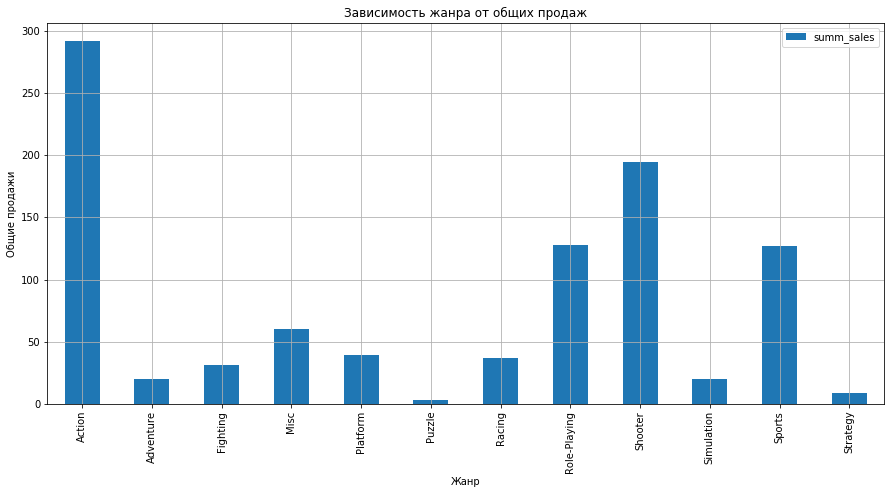

In [51]:
games_data_current_period_genre.plot(kind = 'bar', alpha = 1, grid = True, figsize=(15,7))

plt.title('Зависимость жанра от общих продаж')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')

plt.show()

Из полученныз данных делаем вывод что наиболее востребованными являются жанры: _Action,_ _Sports,_ _Shooter._ Наименее востребованными являются жанры _Puzzle_ и _Strategy._

### Выводы к третьему шагу

Выполнив данный пункт делаем следующие выводы:
* из гистограммы делаем вывод что количество выпускаемых игр резко увеличилось с 2002 года.
* из графиков делаем следующие выводы:
 * пик продаж игр платформы PS2 приходится на 2001 - 2006 годы
 * пик продаж игр платформы Х360 приходится на 2007 - 2013 годы
 * пик продаж игр платформы PS3 приходится на 2007 - 2014 годы
 * пик продаж игр платформы Wii приходится на 2006 - 2011 годы
 * пик продаж игр платформы DS приходится на 2005 - 2010 годы
* на оснавании полученных выше данных выбираем для исследования следующий период: 2006 - 2014 г.
* из диаграммы размаха можно сделать следующие выводы:
 * большая часть проданных игр платформы PS4 лежит в диапазоне: 0,1 - 1,1 миллионов, медиана лежит на уровне 0,3 миллионов
 * большая часть проданных игр платформы PS3 лежит в диапазоне: 0,05 - 0,57 миллионов, медиана лежит на уровне 0,2 миллионов
 * большая часть проданных игр платформы X360 лежит в диапазоне: 0,1 - 0,9 миллионов, медиана лежит на уровне 0,3 миллионов
 * большая часть проданных игр платформы XOne лежит в диапазоне: 0,15 - 1,15 миллионов, медиана лежит на уровне 0,35 миллионов
 * большая часть проданных игр платформы 3DS лежит в диапазоне: 0,04 - 0,3 миллионов, медиана лежит на уровне 0,1 миллионов
* из диаграммы размаха можно сделать следующие выводы:
 * большая часть проданных игр платформы WiiU лежит в диапазоне: 0,05 - 0,6 миллионов, медиана лежит на уровне 0,2 миллионов
 * большая часть проданных игр платформы PC лежит в диапазоне: 0,02 - 0,28 миллионов, медиана лежит на уровне 0,1 миллионов
 * большая часть проданных игр платформы PSV лежит в диапазоне: 0,01 - 0,13 миллионов, медиана лежит на уровне 0,05 миллионов

* из графика зависимоти оценки критиков от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 60 - 70 баллов уже достаточно неплохо влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. С помощью коэфициента корреляции делаем вывод, что в целом эта зависимость положительная, связь относится к категории слабой. Также примечателен тот факт, что оценка критиков влияет практически также на продажи игры, как и оценка пользователей.

* из графика зависимоти оценки критиков от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 70 - 80 баллов влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая. Также примечателен тот факт, что оценка пользователей практически не влияет на продажи игры. Также сравнивая с показателями платформы PS4 делаем вывод что показатели платформы X360 менее явные.

* из графика зависимоти оценки критиков от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Из графика зависимоти оценки пользователей от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая, относится к категории слабой связи. Также примечателен тот факт, что оценка критиков практически в равной степени влияет на продажи игры, как и оценка пользователей. Примечателен тот факт, что у популярной платнофмы PS4 связь между оценками польхователей и критиков сильнее чем у платформы 3DS. Но при этом критики и пользователи в равной степени влияют на продажи.

* из полученныз данных делаем вывод что наиболее востребованными являются жанры: Action, Sports, Shooter. Наименее востребованными являются жанры Puzzle и Strategy.

## Шаг 4. Составьте портрет пользователя каждого региона

In [52]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [53]:
games_data_region_platform = games_data.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])

In [54]:
games_data_region_platform.sort_values(by = [('sum', 'eu_sales')], ascending = False).head()

sum                  
         eu_sales jp_sales na_sales
platform                           
PS2        339.29   139.20   583.84
PS3        330.29    80.19   393.49
X360       270.76    12.43   602.47
Wii        262.21    69.33   496.90
PS         213.61   139.82   336.52

In [55]:
games_data_region_platform.sort_values(by = [('sum', 'jp_sales')], ascending = False).head()

sum                  
         eu_sales jp_sales na_sales
platform                           
DS         188.89   175.57   382.40
PS         213.61   139.82   336.52
PS2        339.29   139.20   583.84
SNES        19.04   116.55    61.23
3DS         61.48   100.67    83.49

In [56]:
games_data_region_platform.sort_values(by = [('sum', 'na_sales')], ascending = False).head()

sum                  
         eu_sales jp_sales na_sales
platform                           
X360       270.76    12.43   602.47
PS2        339.29   139.20   583.84
Wii        262.21    69.33   496.90
PS3        330.29    80.19   393.49
DS         188.89   175.57   382.40

In [57]:
games_data_region_genre = games_data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])

In [58]:
games_data_region_genre.sort_values(by = [('sum', 'eu_sales')], ascending = False).head()

sum                  
        eu_sales jp_sales na_sales
genre                             
Action    519.13   161.43   879.01
Sports    376.79   135.54   684.43
Shooter   317.34    38.76   592.24
Racing    236.51    56.71   359.35
Misc      212.74   108.11   407.27

In [59]:
games_data_region_genre.sort_values(by = [('sum', 'jp_sales')], ascending = False).head()

sum                  
             eu_sales jp_sales na_sales
genre                                  
Role-Playing   188.71   355.41   330.81
Action         519.13   161.43   879.01
Sports         376.79   135.54   684.43
Platform       200.35   130.83   445.50
Misc           212.74   108.11   407.27

In [60]:
games_data_region_genre.sort_values(by = [('sum', 'na_sales')], ascending = False).head()

sum                  
         eu_sales jp_sales na_sales
genre                              
Action     519.13   161.43   879.01
Sports     376.79   135.54   684.43
Shooter    317.34    38.76   592.24
Platform   200.35   130.83   445.50
Misc       212.74   108.11   407.27

In [61]:
games_data_region_rating = games_data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])

In [62]:
games_data_region_rating.sort_values(by = [('sum', 'eu_sales')], ascending = False).head()

sum                  
       eu_sales jp_sales na_sales
rating                           
E        710.52   199.57  1295.55
M        483.97    64.24   748.48
T        427.03   151.40   759.75
E10+     188.52    40.20   353.32
AO         0.61     0.00     1.26

In [63]:
games_data_region_rating.sort_values(by = [('sum', 'jp_sales')], ascending = False).head()

sum                  
       eu_sales jp_sales na_sales
rating                           
E        710.52   199.57  1295.55
T        427.03   151.40   759.75
M        483.97    64.24   748.48
E10+     188.52    40.20   353.32
AO         0.61     0.00     1.26

In [64]:
games_data_region_rating.sort_values(by = [('sum', 'na_sales')], ascending = False).head()

sum                  
       eu_sales jp_sales na_sales
rating                           
E        710.52   199.57  1295.55
T        427.03   151.40   759.75
M        483.97    64.24   748.48
E10+     188.52    40.20   353.32
EC         0.11     0.00     1.53

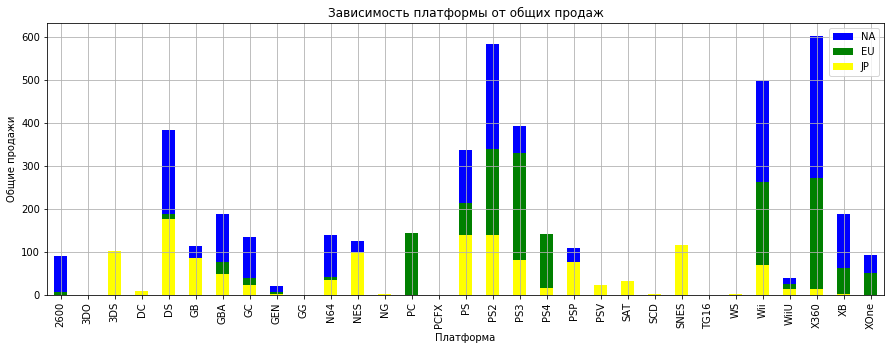

In [65]:
ax1 = games_data_region_platform[('sum', 'na_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#0000FF', label = 'NA', figsize=(15,5))
ax2 = games_data_region_platform[('sum', 'eu_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#008000',label = 'EU', figsize=(15,5))
ax3 = games_data_region_platform[('sum', 'jp_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#FFFF00',label = 'JP', figsize=(15,5))

ax1.set_title('Зависимость платформы от общих продаж')
ax1.set_xlabel('Платформа')
ax1.set_ylabel('Общие продажи')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

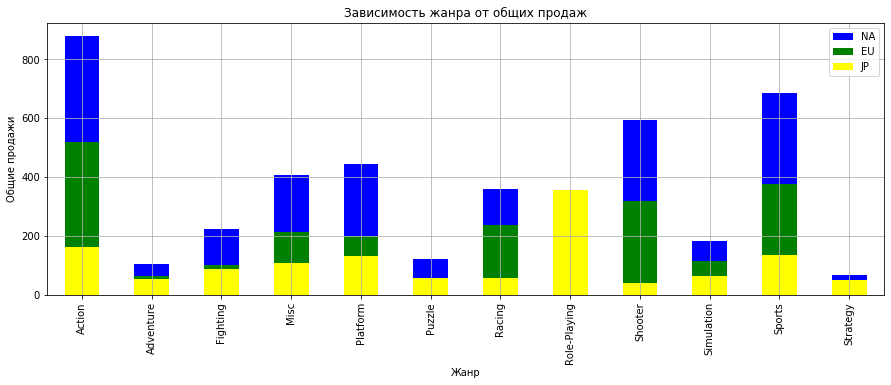

In [66]:
ax1 = games_data_region_genre[('sum', 'na_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#0000FF', label = 'NA', figsize=(15,5))
ax2 = games_data_region_genre[('sum', 'eu_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#008000',label = 'EU', figsize=(15,5))
ax3 = games_data_region_genre[('sum', 'jp_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#FFFF00',label = 'JP', figsize=(15,5))

ax1.set_title('Зависимость жанра от общих продаж')
ax1.set_xlabel('Жанр')
ax1.set_ylabel('Общие продажи')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

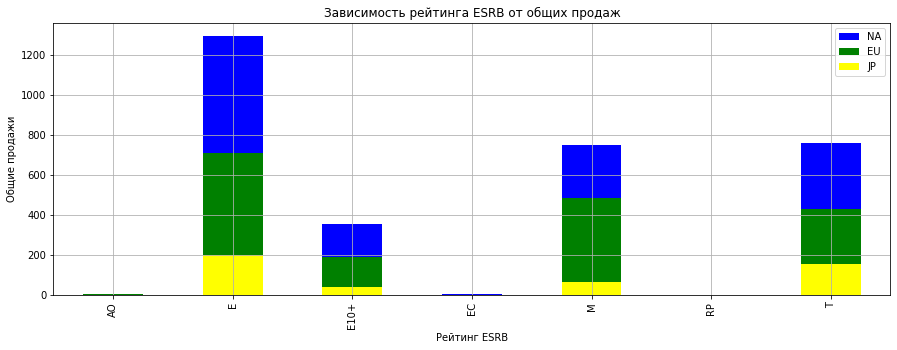

In [67]:
ax1 = games_data_region_rating[('sum', 'na_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#0000FF', label = 'NA', figsize=(15,5))
ax2 = games_data_region_rating[('sum', 'eu_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#008000',label = 'EU', figsize=(15,5))
ax3 = games_data_region_rating[('sum', 'jp_sales')].plot(kind = 'bar', alpha = 1, grid = True, color = '#FFFF00',label = 'JP', figsize=(15,5))

ax1.set_title('Зависимость рейтинга ESRB от общих продаж')
ax1.set_xlabel('Рейтинг ESRB')
ax1.set_ylabel('Общие продажи')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')

plt.show()

### Выводы к четвёртому шагу

Из полученых данных делаем следующие выводы:
В Европе более популярны:
* платформы:
 * PS2
 * PS3
 * X360
 * Wii
 * PS
* жанры:
 * Action
 * Sports
 * Shooter
 * Racing
 * Misc
* рейтинг:
 * E
 * M
 * T
 * E10+
 * AO

В Северной Америке более популярны:
* платформы:
 * X360
 * PS2
 * Wii
 * PS3
 * DS
* жанры:
 * Action
 * Sports
 * Shooter
 * Platform
 * Misc
* рейтинг:
 * E
 * T
 * M
 * E10+
 * EC

В Японии более популярны:
* платформы:
 * DS
 * PS
 * PS2
 * SNES
 * 3DS
* жанры:
 * Role-Playing	
 * Action
 * Sports
 * Platform
 * Misc
* рейтинг:
 * E
 * T
 * M
 * E10+
 * AO
 
 Также по указанным параметрам приведены графики для более наглядной визуализации данных.

## Шаг 5. Проверьте гипотезы

In [68]:
games_data['user_score'] = games_data['user_score'].fillna(-1)
games_data['critic_score'] = games_data['critic_score'].fillna(-1)

games_data_hypothesis = games_data.query('user_score >= 0 & critic_score >= 0')

Заменяем пропуски на маркерное значение "-1" и убираем его при построении датасетов для анализа.

In [69]:
games_data_xbox_one = games_data_hypothesis.query('platform == "XOne"')
games_data_pc = games_data_hypothesis.query('platform == "PC"')

In [70]:
print('Дисперсия выборки Xbox:', np.var(games_data_xbox_one['user_score']))
print('Дисперсия выборки PC:', np.var(games_data_pc['user_score']))

Дисперсия выборки Xbox: 2.503350340136054
Дисперсия выборки PC: 2.5154993820671057


In [71]:
games_data_xbox_one.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summ_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [72]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(games_data_xbox_one['user_score'], games_data_pc['user_score'], equal_var = True)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.751901366556751e-05
Отвергаем нулевую гипотезу


In [73]:
games_data_action = games_data_hypothesis.query('genre == "Action"')
games_data_sports = games_data_hypothesis.query('genre == "Sports"')

In [74]:
print('Дисперсия выборки Action:', np.var(games_data_action['user_score']))
print('Дисперсия выборки Sports:', np.var(games_data_sports['user_score']))

Дисперсия выборки Action: 6.674591392326689
Дисперсия выборки Sports: 9.166650182426226


Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports НЕ различается

H1: Средние пользовательские рейтинги жанров Action и Sports различается

In [75]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(games_data_action['user_score'], games_data_sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.991658848324538e-06
Отвергаем нулевую гипотезу


### Выводы к пятому шагу

В данном пункте проверялось две гипотезы:
* гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверки гипотез установлено, что:
* Средние пользовательские рейтинги платформ Xbox One и PC **отличаются**
* Средние пользовательские рейтинги жанров Action и Sports **различается**

Параметр _alpha = .05_ задавался исходя из его стандартного значения.
Аргумент _equal_var = True_ использовался в таком виде, т. к. дисперсии выборок были близки друг к другу.

## Шаг 6. Напишите общий вывод

В результате проделанной работы можно сделать следующие выводы:


В начале был открыт датасет содержащий информацию о компьютерных играх: название, платформа на которой продавалась игра, дата выпуска, жанр, сумма продаж в зависимости от региона, оценка пользователей и критиков, а также возрастной рейтинг. Датасет состоит из 16 715 строк, преимущественно текстового типа и типа float, также видно что в датасете есть пропуски.

Во втором шаге были переименованы, согласно заданию, столбцы (приведены к нижнему регистру). Удалены строки с пропусками в столбцах _genre_ и _name,_ т. к. всего таких сроки - 2 штуки. Пропуски в столбцах _critic_score_ и _user_score_ не трогал, что бы не искажать данные. Значение _K-A_ столбца _rating_ заменили на _E,_ т. к. _K-A_ устаревшее обозначение. Игр, без указания года оказалось 1.61%, трогать их не будем, т. к. в итоге рассматриваем игры за конкретный период. Столбуц _critic_score_ привел к целочисленному типу. В столбце _user_score_ значения **tbd** _(предстоит определить)_ заменил на _0,_ т. к. данные игры ещё не были оценены. Пропусков в датасете не найдено. И в заключении была вычеслены общая сумма продаж по всем регионам.

В результате проведения исследовательского анализа делаем выводы:
* из гистограммы делаем вывод что количество выпускаемых игр резко увеличилось с 2002 года.
* из графиков делаем следующие выводы:
 * пик продаж игр платформы PS2 приходится на 2001 - 2006 годы
 * пик продаж игр платформы Х360 приходится на 2007 - 2013 годы
 * пик продаж игр платформы PS3 приходится на 2007 - 2014 годы
 * пик продаж игр платформы Wii приходится на 2006 - 2011 годы
 * пик продаж игр платформы DS приходится на 2005 - 2010 годы
* на оснавании полученных выше данных выбираем для исследования следующий период: 2006 - 2014 г.
* из диаграммы размаха можно сделать следующие выводы:
 * большая часть проданных игр платформы PS4 лежит в диапазоне: 0,1 - 1,1 миллионов, медиана лежит на уровне 0,3 миллионов
 * большая часть проданных игр платформы PS3 лежит в диапазоне: 0,05 - 0,57 миллионов, медиана лежит на уровне 0,2 миллионов
 * большая часть проданных игр платформы X360 лежит в диапазоне: 0,1 - 0,9 миллионов, медиана лежит на уровне 0,3 миллионов
 * большая часть проданных игр платформы XOne лежит в диапазоне: 0,15 - 1,15 миллионов, медиана лежит на уровне 0,35 миллионов
 * большая часть проданных игр платформы 3DS лежит в диапазоне: 0,04 - 0,3 миллионов, медиана лежит на уровне 0,1 миллионов
* из диаграммы размаха можно сделать следующие выводы:
 * большая часть проданных игр платформы WiiU лежит в диапазоне: 0,05 - 0,6 миллионов, медиана лежит на уровне 0,2 миллионов
 * большая часть проданных игр платформы PC лежит в диапазоне: 0,02 - 0,28 миллионов, медиана лежит на уровне 0,1 миллионов
 * большая часть проданных игр платформы PSV лежит в диапазоне: 0,01 - 0,13 миллионов, медиана лежит на уровне 0,05 миллионов

* из графика зависимоти оценки критиков от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 60 - 70 баллов уже достаточно неплохо влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы PS4 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. С помощью коэфициента корреляции делаем вывод, что в целом эта зависимость положительная, связь относится к категории слабой. Также примечателен тот факт, что оценка критиков влияет практически также на продажи игры, как и оценка пользователей.

* из графика зависимоти оценки критиков от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Оценки от 70 - 80 баллов влияют на количество проданых игр. Из графика зависимоти оценки пользователей от общей выручки платформы X360 можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая. Также примечателен тот факт, что оценка пользователей практически не влияет на продажи игры. Также сравнивая с показателями платформы PS4 делаем вывод что показатели платформы X360 менее явные.

* из графика зависимоти оценки критиков от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка критиков, тем выше продажи игры. Из графика зависимоти оценки пользователей от общей выручки платформы 3DS можно сделать вывод о том, что чем выше оценка пользователей, тем выше продажи игры. Однако с помощью коэфициента корреляции делаем вывод, что в целом эта зависимость хоть и положительная, но не сильно большая, относится к категории слабой связи. Также примечателен тот факт, что оценка критиков практически в равной степени влияет на продажи игры, как и оценка пользователей. Примечателен тот факт, что у популярной платнофмы PS4 связь между оценками польхователей и критиков сильнее чем у платформы 3DS. Но при этом критики и пользователи в равной степени влияют на продажи.

* из полученныз данных делаем вывод что наиболее востребованными являются жанры: Action, Sports, Shooter. Наименее востребованными являются жанры Puzzle и Strategy.

Портрет пользователя каждого региона выглядит следующим образом:

В Европе более популярны:
* платформы:
 * PS2
 * PS3
 * X360
 * Wii
 * PS
* жанры:
 * Action
 * Sports
 * Shooter
 * Racing
 * Misc
* рейтинг:
 * E
 * M
 * T
 * E10+
 * AO

В Северной Америке более популярны:
* платформы:
 * X360
 * PS2
 * Wii
 * PS3
 * DS
* жанры:
 * Action
 * Sports
 * Shooter
 * Platform
 * Misc
* рейтинг:
 * E
 * T
 * M
 * E10+
 * EC

В Японии более популярны:
* платформы:
 * DS
 * PS
 * PS2
 * SNES
 * 3DS
* жанры:
 * Role-Playing	
 * Action
 * Sports
 * Platform
 * Misc
* рейтинг:
 * E
 * T
 * M
 * E10+
 * AO


В заключении были проверены две гипотезы:
* гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверки гипотез установлено, что:
* Средние пользовательские рейтинги платформ Xbox One и PC **отличаются**
* Средние пользовательские рейтинги жанров Action и Sports **различается**